In [52]:
import pandas as pd
from pathlib import Path

In [53]:
notebook_path = Path().absolute()
data_path = notebook_path / '..' / 'pipeline_results' / 'features_by_detector.csv'
df = pd.read_csv(data_path)
df.head()

,image,patch,SIFT,BRISK,ORB,AKAZE
0,RE_bush_69907702-cf29-4891-bc27-5647bc2070d7.jpg,RE_bush,427,267,720,63
1,RE_bush_029ab72b-172d-47e7-8e95-13380f0effb0.jpg,RE_bush,691,546,1281,119
2,RE_bush_7a676c11-1558-4149-8732-78d29f0aed11.jpg,RE_bush,670,626,1291,106
3,RE_bush_c5140533-4fef-40c1-adab-b637c21c63f0.jpg,RE_bush,399,266,886,103
4,RE_bush_00f1bf08-6c22-407b-8941-07d5f2361c7c.jpg,RE_bush,43,2,126,6


In [55]:
columns = ['SIFT', 'BRISK', 'ORB', 'AKAZE']

detector_means = df[columns].mean()
detector_means.head()

SIFT     175.4284
BRISK    114.3248
ORB      382.6776
AKAZE     40.2640
dtype: float64

In [56]:
detector_stds = df[columns].std()
detector_stds.head()

SIFT     187.496207
BRISK    145.706272
ORB      349.322106
AKAZE     44.695859
dtype: float64

In [57]:
# By patch type and detector
detector_means_per_patch = df.groupby(['patch'])[columns].mean()
detector_means_per_patch.head()

,SIFT,BRISK,ORB,AKAZE
patch,,,,
BR_encrust,207.250000,121.000000,282.250000,35.750000
BR_fucus,53.571429,19.571429,67.285714,13.857143
BR_sarg,217.567010,112.958763,419.845361,48.515464
GR_ulva,66.140152,65.113636,272.575758,13.439394
KE_5rib,80.333333,98.142857,362.142857,18.333333


<AxesSubplot:xlabel='patch'>

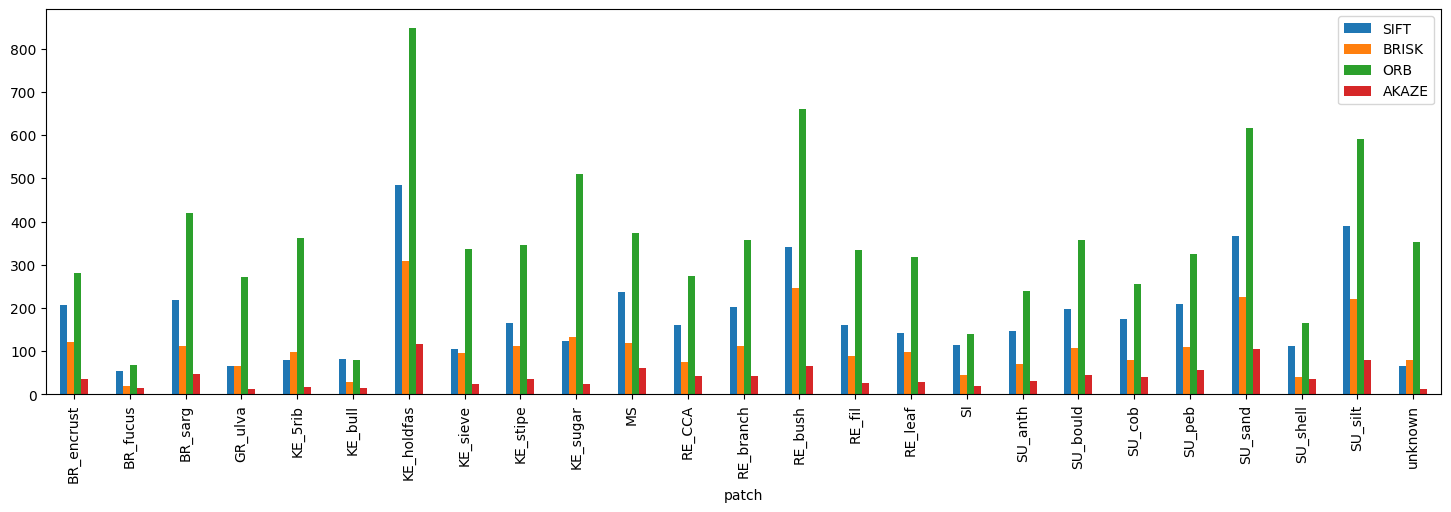

In [61]:
detector_means_per_patch.plot(kind='bar', figsize=(18, 5))

In [59]:
# Normalize using z-score
z_scores = (detector_means_per_patch - detector_means) / detector_stds
z_scores.head()

,SIFT,BRISK,ORB,AKAZE
patch,,,,
BR_encrust,0.169719,0.045813,-0.287493,-0.100994
BR_fucus,-0.649917,-0.650304,-0.902868,-0.590812
BR_sarg,0.224744,-0.009375,0.106400,0.184614
GR_ulva,-0.582882,-0.337742,-0.315187,-0.600159
KE_5rib,-0.507184,-0.111059,-0.058785,-0.490664


<AxesSubplot:xlabel='patch'>

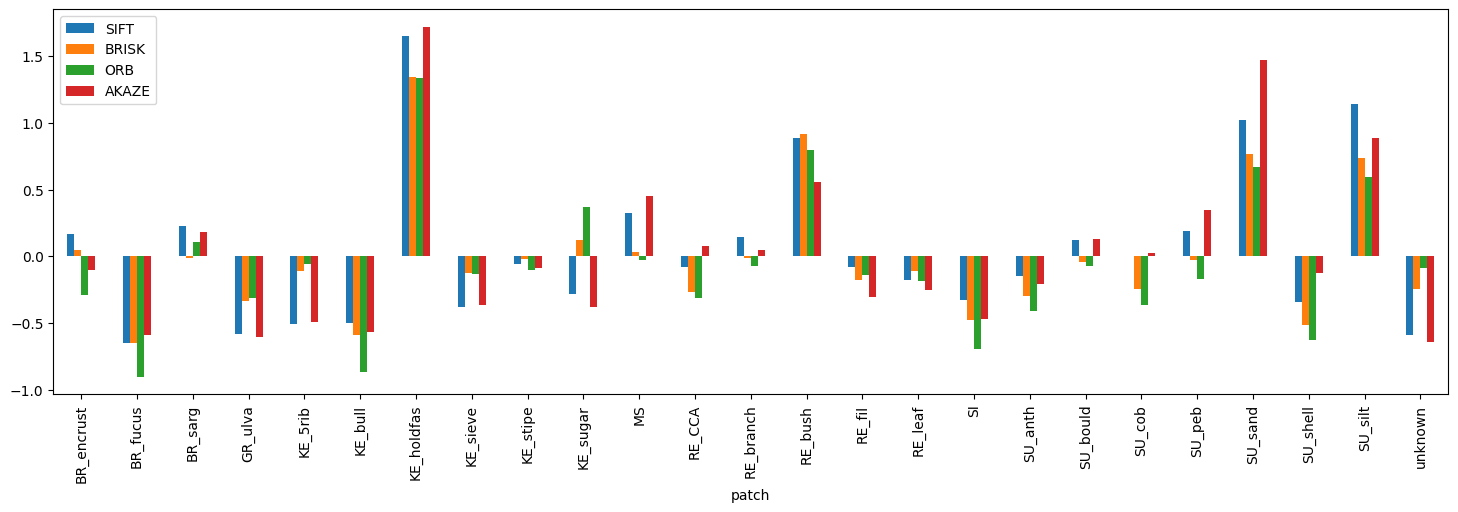

In [62]:
z_scores.plot(kind='bar', figsize=(18, 5))